<a href="https://colab.research.google.com/github/nelsoneitor12/ADA-Informes/blob/main/MergeSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema de ordenamiento

Entrada:Arrgelo/lista de a forma [a1,...,an]

Salida: Arreglo/lista con la misma secuencia de numeros pero ordenada de menor a mayor.
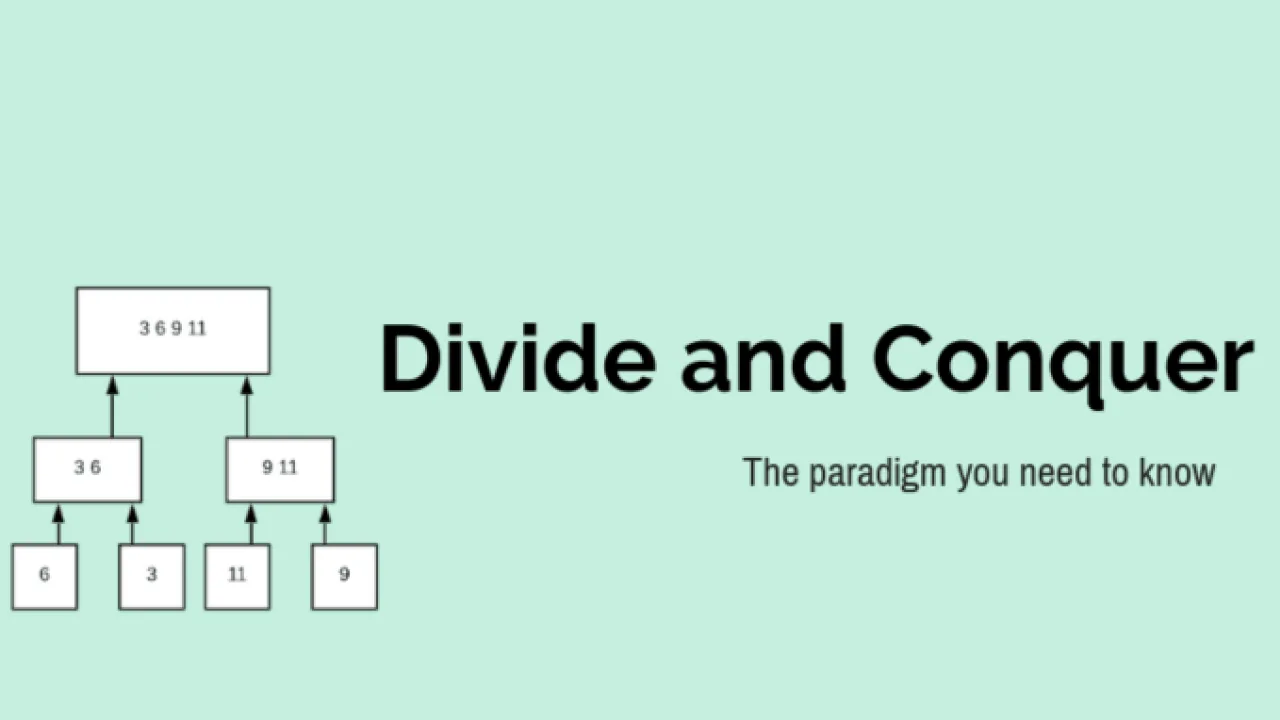

Para desarrollar la variedad de algoritmos que se dispone para resolver problemas de ordenamiento, se ha recurrido a tecnicas muy variadas con logicas quizas no muy obvias cuando se empieza a hacer ejercicios mentales de como podria funcionar un algoritmo de ordenamiento, pero con los que se obtienen resultados muy eficientes que nos ayuda a desarrollar codigos muchos mas optimizados. Uno de estos algoritmos, es el MergeSort, el que usa la tecnica de "Divide y Venceras", el cual una vez planteado es facil de ver sus virtudes, y como este nos brinda una muy buena eficiencia en terminos de tiempo.

# 2. Merge sort

Una de las particularidades de este algoritmo, es que para su funcionamiento requiere de 2 funciones para cumplir su objetivo. Una es la funcion principal (la "MergeSort"), y la otra es el "Merge", la cual veremos mas adelante. Pero primero empezemos con el Merge Sort del cual veremos una implementacion en el siguiente codigo


##2.1 Codigo

In [186]:
def mergeSort(arr, com, com2, verbose):
    if verbose==True: 
      if com[0]==0 :print(f"Input: {arr}\n")
    com[0]+=1
    mid=(len(arr)+1)//2
    if verbose==True: print(f"Llamada numero {com}:\n")
    if len(arr)<=1:
       if verbose==True: print(f"Descomposicion completa, *arreglo de largo 1*. ({arr})\n")
       return arr
    if verbose==True: print(f"Subarreglo izquierdo: {arr[:mid]} / Subarreglo derecho {arr[mid:]}\n")
    
    izq=mergeSort(arr[:mid], com, com2, verbose)
    der=mergeSort(arr[mid:], com, com2, verbose)
    sort_arr=merge(izq, der, com2)
    if verbose==True: 
      print(f"Mezcla de subarreglo izquierdo: {izq} y derecho: {der}:\n*{sort_arr}*\n")
      if len(sort_arr)==(com[0]//2)+1: print(f"already_Sort\noutPut: {sort_arr}")
    return sort_arr 
    
def merge(izq, der, com2):
    aux = []
    i,j = 0,0

    while(i < len(izq) and j < len(der)):
        com2[0]+=1
        if (izq[i] < der[j]):
            aux.append(izq[i])
            i += 1
        else:
            aux.append(der[j])
            j += 1

    for k in range(i,len(izq)):
      com2[0]+=1
      aux.append(izq[k])
    for k in range(j,len(der)):
      com2[0]+=1
      aux.append(der[k])
   
    return aux

a=[21, 44, 82, 115, 129, 165, 240, 242, 275, 362, 398, 511, 565, 571, 576, 583, 586]
comp=[0]
comp2=[0]
print("Entrada: \n", a)
a=mergeSort(a, comp, comp2, verbose=False)
print("salida: \n", a)
print("recursiones: ", comp[0])
print("comparaciones: ", comp2[0])

Entrada: 
 [21, 44, 82, 115, 129, 165, 240, 242, 275, 362, 398, 511, 565, 571, 576, 583, 586]
salida: 
 [21, 44, 82, 115, 129, 165, 240, 242, 275, 362, 398, 511, 565, 571, 576, 583, 586]
recursiones:  33
comparaciones:  70


## 2.2. Descripción del algoritmo

El algoritmo recibe como entrada una lista (o arreglo) $arr$ de tamaño n el cual queremos ordenar.

1. En cada llamada a la funcion el arreglo se divide en 2 sub arreglos, uno que ira desde el primer elemento del arreglo completo hasta la mitad del mismo. Y otro que ira desde la mitad+1 del arreglo completo hasta el ultimo elemento del mismo.(Para una visualizacion mas clara, al primero lo identificaremos como el subarreglo izquierdo y al segundo como el derecho). En el codigo esta division se hacen en las lineas 
```
izq=mergeSort(arr[:mid])
der=mergeSort(arr[mid:])
```
.
2. La funcion se ira llamando asi misma consecutivamente para que al igual que con el arreglo original, los subarreglos se divididan en otros 2 subarreglos, primero con los subarreglos izquierdos, y despues con los subarreglos derechos. Esto se ira repitiendo hasta que uno de los subarreglos quede de tamaño 1, este es el caso base de nuestra funcion recursiva y cuando esto suceda se retornara el mismo subarreglo de tamaño 1.

3. Cuando uno de los sub arreglos se divida en otros 2 de tamaño 1, estos 2 seran traspasados a la funcion "Merge" la cual se encargara de ordenarlos, mezclarlos y retornarlos en un arreglo del mismo tamaño del arreglo que se obtuvieron estos 2. De esta forma cada llamada de la funcion "MergeSort" ira retornando un arreglo izquierdo y derecho ordenados, los cuales seran traspasados a la funcion Merge para ser mezclados, ordenados y retornados al llamado anterior. Esto se ira repitiendo hasta llegar al primer llamado, el cual obtendra por medio de la funcion merge un arreglo del mismo tamaño y elementos que el original, pero ordenado. En el codigo la funcion merge se llama en la siguiente linea: 
```
sort_arr=merge(izq, der, com2)
return sort_arr
```
.

Cabe destacar que independiente de si el arreglo esta mas o menos ordenados, incluso si esta totalemte ordenado. El algoritmo siempre hara la misma cantidad de recursiones, la cual solo varía segun el tamaño del arreglo a ordenar.

![image](https://dotnettutorials.net/wp-content/uploads/2019/09/c-users-pranaya-pictures-merge-sort-in-c-png-768x740.png)

##2.3. Ejemplo:

Usemos de ejemplo el arreglo [5,1,8,2]:

En la primera llamada se divide en los siguientes 2 subarreglos:

**izquierdo=[5,1] derecho=[8,2]**

Despues en la segunda llamada el izquierdo se dividara en:

**izquierdo=[5] derecho=[1]**

En la 3era y 4ta llamada el MergeSort identificara que los subarreglos son de tamaño 1, por lo que los retornara tal como los recibio. 
Una vez retornados estamos devuelta en la segunda llamada, la cual hara una llamada a la funcion "Merge" a la que se le traspasara los subarreglos **izquierdo=[5]** y **derecho=[1]**, y esta los mezclara retornando el **arreglo [1,5]** el cual a su vez sera retornadodo a la primera llamada como el subarreglo izquierdo.

En la 5ta llamada el subarreglo derecho del original **([8,2])**, se dividira en los subarreglos: 
**izquierdo=[8]** y **derecho=[2]**.

En la 6ta y 7ma llamada nuevamente el MergeSort identificara que los subarreglos son de tamaño 1, por lo que los retornara tal como los recibio. 
Una vez retornados estamos devuelta en la 5ta llamada, la cual hara una llamada a la funcion "Merge" a la que se le traspasara los subarreglos **izquierdo=[8]** y **derecho=[2]**, y esta los mezclara retornando el **arreglo [2,8]** el cual a su vez sera retornadodo a la primera llamada como el subarreglo derecho.

Ahora en la primera llamada despues de todas las recursiones, habiendo ya obtenido los subarreglos izquierdo y derecho ordenados, esta los traspasara a la funcion merge **(*izquierdo=[1,5] y derecho=[2,8]*)**, la cual los mezclara y ordenara retornando el arreglo **[1,2,5,8]**, el cual podemos observar facilmente que es el arreglo original pero ordenado. 

Con esto el algoritmo ya habra ordenado nuestro arreglo.



## 2.4. Ejecución del algoritmo paso a paso (`verbose=True`)

Asignando la variable `verbose=True`, veremos detalladamente lo que ocurre en cada llamada de mergeSort

In [187]:
import random
c1=[0]
c2=[0]
##arr = random.sample(range(1, 100), 31)
arr= [3, 22, 105, 274, 286, 312, 454, 462, 485, 496, 505, 514, 547]
a= mergeSort(arr,c1,c2,verbose=True)


Input: [3, 22, 105, 274, 286, 312, 454, 462, 485, 496, 505, 514, 547]

Llamada numero [1]:

Subarreglo izquierdo: [3, 22, 105, 274, 286, 312, 454] / Subarreglo derecho [462, 485, 496, 505, 514, 547]

Llamada numero [2]:

Subarreglo izquierdo: [3, 22, 105, 274] / Subarreglo derecho [286, 312, 454]

Llamada numero [3]:

Subarreglo izquierdo: [3, 22] / Subarreglo derecho [105, 274]

Llamada numero [4]:

Subarreglo izquierdo: [3] / Subarreglo derecho [22]

Llamada numero [5]:

Descomposicion completa, *arreglo de largo 1*. ([3])

Llamada numero [6]:

Descomposicion completa, *arreglo de largo 1*. ([22])

Mezcla de subarreglo izquierdo: [3] y derecho: [22]:
*[3, 22]*

Llamada numero [7]:

Subarreglo izquierdo: [105] / Subarreglo derecho [274]

Llamada numero [8]:

Descomposicion completa, *arreglo de largo 1*. ([105])

Llamada numero [9]:

Descomposicion completa, *arreglo de largo 1*. ([274])

Mezcla de subarreglo izquierdo: [105] y derecho: [274]:
*[105, 274]*

Mezcla de subarreglo izquie

# 3. Funcion Merge

Ya visto como funciona el MergeSort, ahora solo queda ver como funciona la funcion Merge. Ya que esta es la que se encarga de ordenar los distintos subarreglos que se les traspasa, es fundamental entender como esta trabaja para ordenarlos.

Veremos una implementacion de la funcion en el siguiente codigo.


##3.1 Codigo

In [88]:
def merge(izq, der, com2):
    aux = []
    i,j = 0,0
    print(f"Input\n Izq={izq}///Der={der}\n\n")
    while(i < len(izq) and j < len(der)):
        com2[0]+=1
        print(f"Iteracion nro {com2[0]}:\n")
        print(f"i={i} j={j}\n")
        if (izq[i] < der[j]):
            aux.append(izq[i])
            print(f"izq[{i}]={izq[i]}<der[{j}]={der[j]}\n i++({i+1})\n")
            print(f"arreglo auxiliar= {aux}\n\n")
            i += 1
        else:
            aux.append(der[j])
            print(f"der[{j}]={der[j]}<izq[{i}]={izq[i]}\n j++({j+1})\n")
            print(f"arreglo auxiliar= {aux}\n\n")
            j += 1
    print("fin de iteracion")
    for k in range(i,len(izq)):
      if k==i: print(f"Subarreglo con elementos sobrantes= izq{izq[k:]}\n\n Rellenando con los elementos faltantes:")
      aux.append(izq[k])
      print(f"aux={aux}")
    for k in range(j,len(der)):
      if k==j: print(f"Subarreglo con elementos sobrantes= der{der[k:]}\n\n Rellenando con los elementos faltantes:")
      aux.append(der[k])
      print(f"aux={aux}")
    print(f"all_sorted\nOutput={aux}")
    return aux

## 3.2. Descripción del algoritmo
El algoritmo recibe como entrada 2 arreglos (los subarreglos izquierdo y derecho), los cuales la funcion mezclara ordenandolas de menor a mayor en un arreglo auxiliar que se creara en la misma funcion.

1. Se inicia una iteracion con un indice i para el arreglo izquierdo y uno j para el arreglo derecho, con la condicion de que se itere hasta que uno de estos alcanze el tamaño de su arreglo correspondiente.

2. En cada iteracion se comparara los subarreglos izq[i] y der[j]. El que contenga el elemento menor se agregara al arreglo auxiliar y su indice se aumentara en 1.

3. La accion anterior se repetira hasta que uno de los subarreglos se termine de agregar por completo al arreglo auxiliar, y cuando esto ocurra, se iniciara otra iteracion especifica para terminar de agregar los elementos faltantes del otro arreglo. Estos al ya venir ordenados se guardaran en el mismo orden como se encuentroban por defecto, por lo que no es necesario realizar ninguna otra operacion ademas de almacenarlos en el arreglo auxiliar.

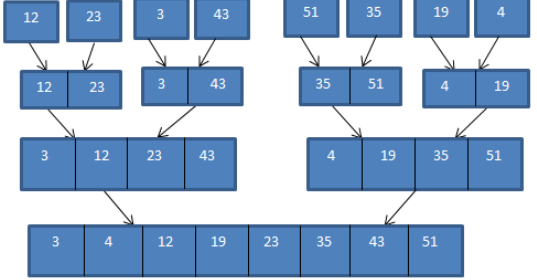


##3.3. Ejemplo:

Usaremos los subarreglos **[5,10]** y **[7,9]** de ejemplo:

En la primera iteracion con i=j=0, se compara izq[i]=5 con der[j]=7, ya que izq[0] es menor, este se agrega al auxiliar y el indice e aumenta en 1 quedando i=1 y j=0, con el arreglo **aux=[5].

En la segunda iteracion, **der[0]=7** es menor que **izq[1]=10**, por lo que esta vez der[j] es el que se agrega al arreglo auxiliar y su indice se aumenta en uno, quedando i=j=1 y **aux=[5,7]**.

En la tercera iteracion, nuevamente der[j] es mayor a izq[i], teniendo de valores los elementos 9 y 10 respectivamente, por lo que der[j] se agrega al arreglo auxiliar quedando **aux=[5,7,9]**, y el indice j aumentandose en 1. Pero como j ahora es del valor del tamaño del arreglo al que corresponde **(der)**, la iteracion se rompe.

Ahora el ultimo paso es agregar los elementos sobrantes del arreglo izq, que en este caso es solo un elemento por lo que habra una sola iteracion para ello (y como vimos anteriormente niunguna comparacion), con lo que obtendriamos finalmente el arreglo **aux=[5,7,9,10]**, que es el arreglo que nos retornara la funcion.

## 2.4. Ejecución del algoritmo paso a paso (`verbose=True`)

Asignando la variable `verbose=True`, ahora veremos paso a paso como funciona la funcion merge:

In [89]:
izq = [5,7,9,10,20]
der = [8,11,18,30,31]
com2=[0]
a= merge(izq, der, com2)

Input
 Izq=[5, 7, 9, 10, 20]///Der=[8, 11, 18, 30, 31]


Iteracion nro 1:

i=0 j=0

izq[0]=5<der[0]=8
 i++(1)

arreglo auxiliar= [5]


Iteracion nro 2:

i=1 j=0

izq[1]=7<der[0]=8
 i++(2)

arreglo auxiliar= [5, 7]


Iteracion nro 3:

i=2 j=0

der[0]=8<izq[2]=9
 j++(1)

arreglo auxiliar= [5, 7, 8]


Iteracion nro 4:

i=2 j=1

izq[2]=9<der[1]=11
 i++(3)

arreglo auxiliar= [5, 7, 8, 9]


Iteracion nro 5:

i=3 j=1

izq[3]=10<der[1]=11
 i++(4)

arreglo auxiliar= [5, 7, 8, 9, 10]


Iteracion nro 6:

i=4 j=1

der[1]=11<izq[4]=20
 j++(2)

arreglo auxiliar= [5, 7, 8, 9, 10, 11]


Iteracion nro 7:

i=4 j=2

der[2]=18<izq[4]=20
 j++(3)

arreglo auxiliar= [5, 7, 8, 9, 10, 11, 18]


Iteracion nro 8:

i=4 j=3

izq[4]=20<der[3]=30
 i++(5)

arreglo auxiliar= [5, 7, 8, 9, 10, 11, 18, 20]


fin de iteracion
Subarreglo con elementos sobrantes= der[30, 31]

 Rellenando con los elementos faltantes:
aux=[5, 7, 8, 9, 10, 11, 18, 20, 30]
aux=[5, 7, 8, 9, 10, 11, 18, 20, 30, 31]
all_sorted
Output=[5, 7, 8, 9, 

#4. Correctitud

Ahora veremos la correctitud del **"MergeSort"** y de la funcion **"Merge"**.

##4.1 Correctitud MergeSort

### **Teorema (Correctitud).**

El algoritmo MergeSort genera un arreglo: $[a_1',a_2',...,a_n']$, con los mismos elementos del arreglo de entrada ordenados de menor a mayor, es decir, $a_1'\leq a_2' \leq... \leq a_n'$.


## Prueba del Teorema 

**Inicialización**

>Cuando $n=1$, MergeSort retorna el único elemento, por lo que se cumple la propiedad. 

**Mantención**

>Para $n$ elementos, el algoritmo divide el arreglo en dos subarreglos de tamaños $Izq=\lfloor \frac{n}{2}\rfloor$ y $Der=\lceil \frac{n}{2}\rceil$ y estos son ordenados con el mismo algoritmo mergesor, y como el tamaño de los subarreglos es menor a $n$, con la induccion se asume que la propiedad es correcta. 

**Finalizacion**

Finalmente, los dos subarreglos se combinan con la funcion merge. Y según el Teorema, el Merge nos retorna un arreglo con los mismos elementos de los subarreglos pero ordenados, por lo tanto **MergeSort es correcto**.

##4.2 Correctitud Funcion Merge

Usando los parametros del siguiente ejemplo de una funcion Merge(A,p,q,r)

![image](https://prodavmoodle.ucv.cl/pluginfile.php/2081308/mod_forum/post/734728/image.png)

Se puede definir la siguiente propiedad invariante de bucle:

>Al comienzo de cada iteracion k, el subarreglo A[p,..,k-1] contiene los k-p elementos mas pequeños de los arreglos L[0,..,n] y R[0,..,m] ordenados de menor a mayor. Mientras los elementos en L[i] y R[j] , son los mas pequeños de sus respectivos arreglos que aun no se han copiado a A.

## Prueba del Teorema 

**Inicialización**

Usando esta propiedad al comenzar en la primera iteracion k-p=0, esto significa que A es un arreglo vacio y un arreglo vacio siempre esta ordenado, por otra parte L[0] y R[0] son los menores elementos de sus respectivos arreglos y estos aun no se han copiado a A.

**Mantención**

Usando de ejemplo una segunda iteracion donde k-p=1 ahora en A se encuentra el elemento menor entre el L[0] y R[0] de la iteracion anterior. en el caso de haber sido L, i ahora vale 1. Y se compararia L[1] con R[0], estos nuevamente son los menores elementos de sus respectivos arreglos que aun no se copian a A, y A al contener un solo elemento este esta ordenad, y es facil ver que esta condicion se seguira cumpliendo a medida que se siga iterando.

**Finalizacion**

Cuando k=r+1, tendremos que A[p,..,k-1] es igual a A[p,..,r], Este seria el arreglo completo con todos los elementos de los 2 arreglos L y R, y ordenados de menor a mayor, por lo que se confirma la correctitud de la funcion.



#5. Tiempo de ejecucion

Ya que este es un algoritmo recursivo, para analizar el tiempo de ejecucion vamos a usar una "ecuacion recurrente". Para ello nos vamos a basar en una forma general de obtener esta ecuacion que nos dice que:
1. Para un tamaño de problema muy pequeño el algoritmo sera constante, entonces tendremos un **T(N)=O(1)** (T(N) es el tiempo de ejecucion).

2. Despues para tamaños muy grandes, ya que el algoritmo divide el problema en **"a"** subproblemas que a su vez son **1/b** veces el problema original, obtenemos **aT(N/b)**, que nos indica el tiempo que se demora el algoritmo en resolver estos Sub-Problemas del problema original de tamaño **"N"**.

3. Y finalmente sumamos el tiempo que se demora el algoritmo en dividir el problema original en los **a** subproblemas, y el tiempo que se demora en combinar los mismos **(D(n) y C(n) respectivamente)**.

Graficamente nos quedaria algo asi:

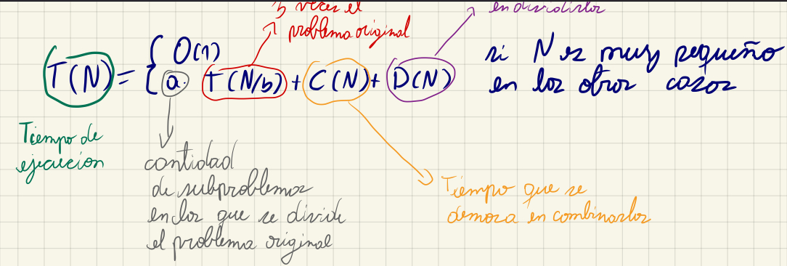


Ahora en el caso del MergeSort reemplazondo la ecuaciona anterior obtenemos que:

>En cada recurrencia se divide el problema en 2 subproblemas. Y cada subproblema es 1/2 del problema original, entonces **a=2 y b=2**.

>Siempre se divide el problema en 2 por lo que esta operacion en tiempo es constante, entonces **D(n)=O(1)** (por lo que este es irrelevante para el total del tiempo de ejecucion).

> Y finalmente la funcion merge que es la que nos combina cada subproblema dividido anteriormente, tiene complejidad lineal. Entonces **C(n)=O(n)**.

Sumamos todos estos tiempos de ejecucion y obtenemos la siguiente ecuacion:

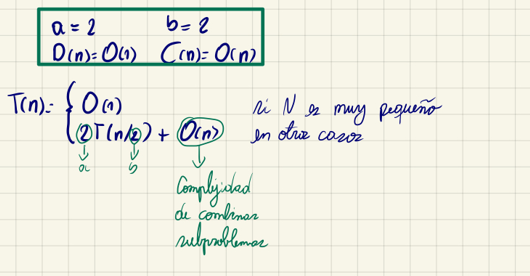

##5.1Arbol de Recurrencia

Ahora usaremos la ecuacion recurrente obtenida anteriormente para armar un arbol de recurrencia. Para ello se reemplaza la complejidad de dividir que es constante por una constante ***c*** **(O(1)=c)** y la complejidad de combinar que es lineal, la reemplazamos por la constante **c** anterior multiplicado por el tamaño del problema original (**tamaño n**), osea **O(n)=c*n**. Y con esto obtendremos la siguiente ecuacion
  
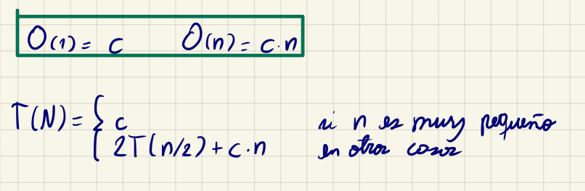  


Ya con la ecuacion lista procedemos a armar el arbol de recursion:

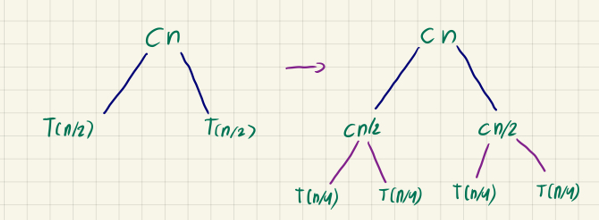

Y esto lo repetimos hasta que nos quede **"cn/n=c"**:

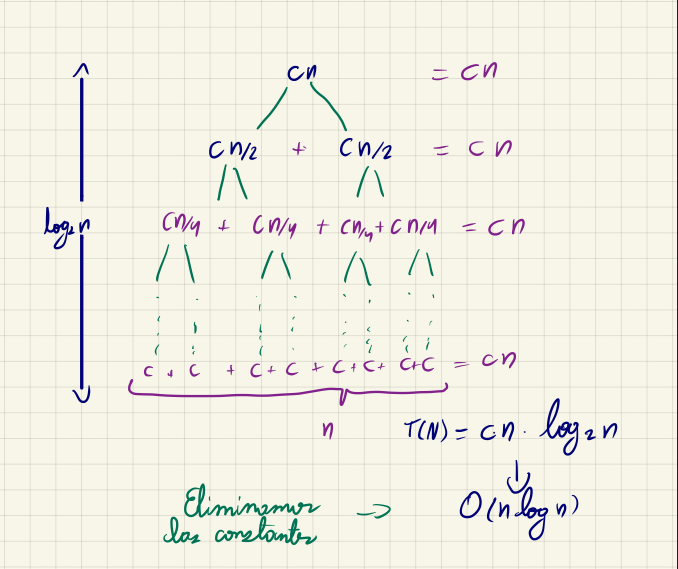

Nos podemos dar cuenta de que la altura del arbol es **log2(n)**, este logaritmo representa la cantidad de veces que se tiene que dividir el problema orriginal en 2 para obtener un subproblema de tamaño 1 (o menor o igual para ser mas exactos).
Con todo lo anterior si sumamos todos los tiempos de recurcion obtenemos cnlog2(n), osea que la complejidad temporal es O(nlogn).

#6. Experimenos



##6.1 Comparacion entre el mejor y el peor caso

Ya analizado el tiempo de ejecucion del algoritmo pudimos observar que la complejidad temporal del algoritmo en el mejor y peor caso es la misma. 
Y para darnos una imagen mas clara de esto vamos a graficar estos 2 casos, ademas de un caso promedio.

In [213]:
def merge(izq, der, com2):
    aux = []
    i,j = 0,0

    while(i < len(izq) and j < len(der)):
        com2[0]+=1
        if (izq[i] < der[j]):
            aux.append(izq[i])
            i += 1
        else:
            aux.append(der[j])
            j += 1

    for k in range(i,len(izq)):
      com2[0]+=1
      aux.append(izq[k])
    for k in range(j,len(der)):
      com2[0]+=1
      aux.append(der[k])
   
    return aux

In [214]:

import matplotlib.pyplot as plt
import math
x=[n  for n in range(5,30)]
y=[]
y1=[n*math.log2(n) for n in range(5,30)]
y2=[n*math.log2(n) for n in range(5,30)]
c1[0]=0
c2[0]=0

for n in range(5,30):
  c2[0]=0
  a=random.sample(range(1,100), n)
  a=mergeSort(a,c1, c2, verbose=False)
  y.append(c2[0])

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["MergeSort", "peor caso", "mejor caso"])

plt.xlabel('n')
plt.ylabel('numero de comparaciones')
plt.show()


TypeError: ignored

Podemos observar que  los 3 casos son milimetricamente identicos, con la unica variacion que se produce, porque, al momento de simular matematicamente los peores y mejores casos teoricos, el numero de comparaciones de esto obtienen valores decimales. Mientras los numeros de comparaciones que nos da el algoritmo practico, son siempre numeros enteros.

##6.2 Comparacion de tiempo de ejecucion entre el Mergesort y el InsertionSort

Ahora veremos un comparacion del tiempo de ejecucion de los algoritmos MergeSort e Insertion Sort:

####Codigos de insertion sort y Merge Sort personalizados para medir el tiempo:

In [202]:
from timeit import default_timer

def Insertion_Sort(arr):
  
  tam=len(arr)
  comp=0 
  cont=0
  auxi=0
  inicio=default_timer()
  for i in range(1,tam+1):
    if i==tam:
       final=default_timer()
       break
    for j in range(i, 0, -1):
      if arr[j]<arr[j-1]:
          arr[j] , arr[j-1] = arr[j-1] , arr[j]
      else:
        break
  tiempo=final-inicio
  return tiempo

def mergeSort(arr, com, inicio, tiempo):
    if com[0]==0: inicio=default_timer()
    com[0]+=1
    mid=(len(arr)+1)//2
    if len(arr)<=1:return arr
    izq=mergeSort(arr[:mid], com, inicio, tiempo)
    der=mergeSort(arr[mid:], com, inicio, tiempo)
    sort_arr=merge(izq, der)
    if len(sort_arr)==(com[0]//2)+1:
      final=default_timer()
      tiempo[0]=final-inicio
    return sort_arr 
    
def merge(izq, der):
    aux = []
    i,j = 0,0
    while(i < len(izq) and j < len(der)):
        if (izq[i] < der[j]):
            aux.append(izq[i])
            i += 1
        else:
            aux.append(der[j])
            j += 1
    for k in range(i,len(izq)):
      aux.append(izq[k])
    for k in range(j,len(der)):
      aux.append(der[k])
    return aux


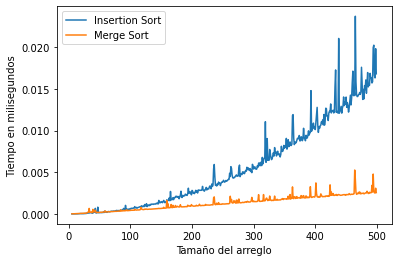

In [200]:
x=[n for n in range(5,500)] 
y=[];
y1=[];
com=[0]
tiempo2=[0.0]
inicio=0
for n in range(5,500):
  a = random.sample(range(1, 600), n)
  inicio=0,0
  com[0]=0
  tiempo2[0]=0.0
  b = random.sample(range(1, 600), n)
  tiempo1 = Insertion_Sort(a)
  b = mergeSort(b, com, inicio, tiempo2)
  y.append(tiempo1)
  y1.append(tiempo2[0])

plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["Insertion Sort", "Merge Sort"])

plt.xlabel("Tamaño del arreglo")
plt.ylabel("Tiempo en milisegundos")
plt.show()

En el grafico anterior podemos observar claramento en ambos olgaritmos como se ve reflejado la tendencia a seguir el comportamiento de su complejidad temporal teorica, es decir, las curvas resultantes de graficar la funcion n^2 en el caso del Insertion Sort, y un grafico de la funcion nlog(n) en el caso de la Merge Sort.

Por otra parte podemos observar como el Merge sort es mucho mas eficiente que el insertion sort en terminos temporales. Pero tambien podemos observar que esto es solo a partir de los arreglos de tamaño 100 aproximadamente.


Ahora observemos como se comportan antes de estos 100 casos para ver si la superioridad del merge sort se mantiene.

####Ejemplo de arreglos de 5 hasta 100:

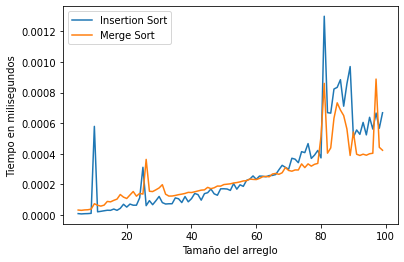

In [208]:
x=[n for n in range(5,100)] 
y=[];
y1=[];
com=[0]
tiempo2=[0.0]
inicio=0
for n in range(5,100):
  a = random.sample(range(1, 600), n)
  inicio=0,0
  com[0]=0
  tiempo2[0]=0.0
  b = random.sample(range(1, 600), n)
  tiempo1 = Insertion_Sort(a)
  b = mergeSort(b, com, inicio, tiempo2)
  y.append(tiempo1)
  y1.append(tiempo2[0])

plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["Insertion Sort", "Merge Sort"])

plt.xlabel("Tamaño del arreglo")
plt.ylabel("Tiempo en milisegundos")
plt.show()

####Ejemplo de arreglos de 5 hasta 60:

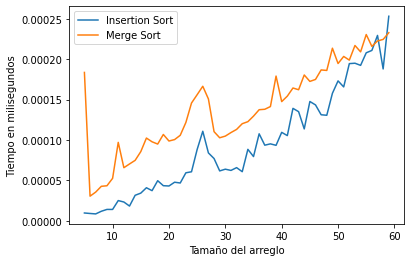

In [212]:
x=[n for n in range(5,60)] 
y=[];
y1=[];
com=[0]
tiempo2=[0.0]
inicio=0
for n in range(5,60):
  a = random.sample(range(1, 600), n)
  inicio=0,0
  com[0]=0
  tiempo2[0]=0.0
  b = random.sample(range(1, 600), n)
  tiempo1 = Insertion_Sort(a)
  b = mergeSort(b, com, inicio, tiempo2)
  y.append(tiempo1)
  y1.append(tiempo2[0])

plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["Insertion Sort", "Merge Sort"])

plt.xlabel("Tamaño del arreglo")
plt.ylabel("Tiempo en milisegundos")
plt.show()

Visto los 2 ejemplos anteriores, nos podemos dar cuenta de como entre los arreglos de tamaño 50-60 aprox, al contrario de como pasa con arreglos de tamaños muy grandes el Insertion Sort se vuelve mas eficiente que el merge sort.
Con esto podemos concluir que el Merge Sort a pesar de su fama de ser un algoritmo muy eficiente, no siempre es el algoritmo ideal para ser usado cuando nuestro objetivo es obtener el mejor resultado posible en terminos del tiempo de ejecucion. Y si nos fijamos solo en estos 2 algoritmos comparados, el cual usar dependera del tamaño de los arreglos que vayamos a procesar.